In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


### Ground Rules

* I am not a lecturer, 
* So by corollary, this is not a lecture, 
* This is a dialog. 


* Chat, talk, participate - what you find comfortable.


### Basics about the talk
* This is a jupyter (**JU**(lia) + **PY**(thon) + **R**) notebook. 
* It's used for interactive coding. 

### Know Your Speaker

- Rohit Pruthi, Decision Scientist @ Rolls-Royce Data Labs

- IIT Roorkee, B.Tech, Mechanical Engineering **--** 2003-2007
- General Electric, Gas Turbine Design **--** 2007-2018
- Rolls-Royce, Data Science **--** 2018-

### What we will talk about

* **Data** : Exams - what impacts marks or performance in school?
* **Methods** : Basic machine learning, multicollinearity, active learning (if time permits)
* **Tools** : Python in Jupyter

### Quick Question 

What do you think most impacts marks? 

### 0.0 Introducing the dataset - Let us talk about exams.

Like everything else these days, there is a data driven approach to this too! 

This [link](https://archive.ics.uci.edu/ml/datasets/student+performance) has some collected data on school performance in three terms of the year for two schools in Portugal. 

In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns
import ipywidgets as widgets

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

import matplotlib.pyplot as plt

In [2]:
url = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip")

#Download Zipfile and create pandas DataFrame
zipfile = ZipFile(BytesIO(url.read()))
maths_marks = pd.read_csv(zipfile.open('student-mat.csv'), sep = ';')

#### What columns are there in this data?

In [3]:
colList = maths_marks.columns

In [4]:
colList

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### What do these mean:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

#### Meaning of the grades
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

#### Let us do some visualization - what do you think impacts marks?

#### Some features are non numerical

In [7]:
feature_selector = widgets.Dropdown(
    options=colList,
    value='Mjob',
    description='Column:',
)

def update_plot(columns):
    return sns.boxplot(data = maths_marks, x=columns, y='G3')

interactive(update_plot, columns=feature_selector)

interactive(children=(Dropdown(description='Column:', index=8, options=('school', 'sex', 'age', 'address', 'fa…

#### and some are numerical

In [6]:
feature_selector = widgets.Dropdown(
    options=colList,
    value='G3',
    description='Column:',
)

def update_plot(columns):
    return sns.scatterplot(data = maths_marks, x=columns, y='G3')

interactive(update_plot, columns=feature_selector)

interactive(children=(Dropdown(description='Column:', index=32, options=('school', 'sex', 'age', 'address', 'f…

So, what did we **learn**?

* High scores in prior terms results in higher marks
* Absenses can result in lower marks
* Higher study time results in more marks

### By that experience, what is learning?

The dataset that we are looking at

* The ability to tell how much you would score before the exam. 
* You do that all the time, don't you? 

* Your teachers, or your parents probably do it better! There's a reason for that too - Homework - learn about different types of bias in machine learning?

Behind this intution are examples from history. We all learn from examples. 

And if a machine does that, that's machine learning. 


### 1.0 What is correlation?

In non mathematical terms, it is easy to understand correlation using the below picture. 

* Do two things move together?
* Do they move independently of each other?
* Do they move opposite of each other?

![alt text](pearson-2-small.png "Correlation")

If you have used data science or statistics earlier, you would have heard the caution *'Correlation is not causation'*. 

In practice, some time **correlation is not even the correct measure of dependence**.

We need to understand how it is defined before making use and there are some experiments in better forms of looking at dependence. 

### 2.0 Homework - get to know correlation better : spearman-rank, pearson, kendall

* The score ranges from ____________ 
* Tells if there is a strong linear relationship — either in a positive or negative direction. 

* What about non linear relationship? Sine curve, step function?  

* How can you handle category columns? 

* Are there any other limitation on correlation?


### 3.0 Let us look at correlation and what it means

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numCol = maths_marks.select_dtypes(include=numerics).columns

feature_selector = widgets.Dropdown(
    options=numCol,
    value='G3',
    description='Column:',
)

def update_heatmap(columns):
    a4_dims = (5, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    return sns.heatmap(maths_marks.corr()[[columns]], vmin=-1, vmax=1, cmap="RdYlGn", linewidths=0.5, annot=True)

interactive(update_heatmap, columns=feature_selector)


interactive(children=(Dropdown(description='Column:', index=15, options=('age', 'Medu', 'Fedu', 'traveltime', …

This is correlation matrix - technically bar, but all columns can be assembled, will come up later! 

What this tells you is

* High scores in prior terms results in higher marks
* Absenses can result in lower marks 
* Higher study time results in more marks

Remember how we concluded some of these in the earlier plot?

Correlation is a way to enumerate that learning. 



### 4.0 Feature engineering & selection

So, what all this means regarding our topic?

All of these which contribute to a machine learning how much a student would score are **features**

Not all features contribute equally as you now like (Study time for example!), and sometimes a combination may work well!


#### What is the harm if we use correlated features, i.e multi-collinearity?

* Multicollinearity [1](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) can be a problem in a regression model from point of view of interpretability

* we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. 


* For example, let’s assume that in the following linear equation:

                                            Y = W0+W1*X1+W2*X2

* Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

                “ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”

* Multicollinearity may not affect the accuracy of the model as much. 

* But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

### 5.0 Build a model now - Homework II, understand this more

In [9]:
target = ['G3']

X = maths_marks[numCol].drop(target, axis = 1).values
y = maths_marks[target].values

print('X : {} \t y : {}'.format(X.shape, y.shape))

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
print('Training Size : {} Testing Size : {}'.format(X_train.shape, X_test.shape))

lasso = LassoCV(cv=10, random_state=0, normalize=False, n_jobs=-1)
lasso.fit(X_train, y_train[:,0])
print('R2 Score {:.5f}'.format(lasso.score(X_test, y_test[:,0])))

X : (395, 15) 	 y : (395, 1)
Training Size : (276, 15) Testing Size : (119, 15)
R2 Score 0.78798


Perfect! Excellent model. Let's see what features matter

In [10]:
features_df_reduced = pd.DataFrame(maths_marks[numCol].drop(target, axis = 1).columns, columns=['features'])
features_df_reduced['lasso_coeff'] = lasso.coef_
#features_df_reduced['scaler_coeff'] = scaler.scale_
features_imp = features_df_reduced[features_df_reduced.lasso_coeff !=0]
eq_feats = features_imp.sort_values('lasso_coeff',ascending= False)
eq_feats

,features,lasso_coeff
14,G2,18.446817
13,G1,1.531818
12,absences,1.131559
10,Walc,0.381076
6,famrel,0.288360
11,health,0.095741
1,Medu,0.064430
0,age,-0.930976


Prior marks are important. we know that already. Looks like Absences are important too and weekend alcohol consumption!

How about some feature engineering? 

Let us remove features which are more correlated to each other, see if that effect accuracy. 

In [11]:
def run_model(x):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    maths_marks_numerical = maths_marks.select_dtypes(include=numerics)
    corr = maths_marks_numerical.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)

    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= x:
                if columns[j]:
                    columns[j] = False

    maths_marks_reduced = maths_marks_numerical[maths_marks_numerical.columns[columns]]  
    selected_columns = maths_marks_reduced.columns

    print("Number of columns in the dataset: "+str(len(maths_marks.columns)))

    print("Number of numerical columns in the dataset: "+str(len(maths_marks_numerical.columns)))

    print("Number of columns after removing highly correlated columns: "+str(len(selected_columns)))

    target = ['G1']

    X = maths_marks_reduced.drop(target, axis = 1).values
    y = maths_marks_reduced[target].values

    print('X : {} \t y : {}'.format(X.shape, y.shape))

    scaler = MinMaxScaler(feature_range=(0,1))
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
    print('Training Size : {} Testing Size : {}'.format(X_train.shape, X_test.shape))

    lasso = LassoCV(cv=10, random_state=0, normalize=False, n_jobs=-1)
    lasso.fit(X_train, y_train[:,0])
    print('R2 Score {:.5f}'.format(lasso.score(X_test, y_test[:,0])))
    
    

In [12]:
threshold_selector = widgets.FloatSlider(min=0, max=0.95, step=0.01, value=10)

interact(run_model, x = threshold_selector)

interactive(children=(FloatSlider(value=0.95, description='x', max=0.95, step=0.01), Output()), _dom_classes=(…

<function __main__.run_model(x)>

### Recap

As soon as your critical feature drops out, model cannot learn anymore. Like if you didn't know the previous marks of a student it's not easy getting their new marks. 

Did you note that we did not use about half of the columns because they are not numeric?

That's a limitation to correlation based feature engineering. 

### 6.0 Enter PPS

There is another different way of thinking about correlation. (following excerpt from their github page, link below)

**PPS - Predictive Power Score uses decision trees as the basis of calculation relationship between variables rather than linear relationship**

Calculate the Predictive Power Score (PPS) for "x predicts y"

    The score always ranges from 0 to 1 and is data-type agnostic.

    A score of 0 means that the column x cannot predict the column y better than a naive baseline model.

    A score of 1 means that the column x can perfectly predict the column y given the model.

    A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.

Learning algorithm

As a learning algorithm, we currently use a Decision Tree because the Decision Tree has the following properties:

    can detect any non-linear bivariate relationship
    good predictive power in a wide variety of use cases
    low requirements for feature preprocessing
    robust model which can handle outliers and does not easily overfit
    can be used for classification and regression
    can be calculated quicker than many other algorithms

We differentiate the exact implementation based on the data type of the target column:

    If the target column is numeric, we use the sklearn.DecisionTreeRegressor
    If the target column is categoric, we use the sklearn.DecisionTreeClassifier

Please note that we prefer a general good performance on a wide variety of use cases over better performance in some narrow use cases. If you have a proposal for a better/different learning algorithm, please open an issue


You can always read about [it](https://github.com/8080labs/ppscore). Let us try it out. 

### Before trying it out, do we know what is a decision tree? Another homework..!

### 7.0 Time to install ppscore

In [19]:
#!pip install ppscore
import ppscore as pps

### 8.0 Create data for exploration

This is a square function, which would intentionally fail the correlation test (I know, wickedly simple! and copied from the documentation of ppscore). 

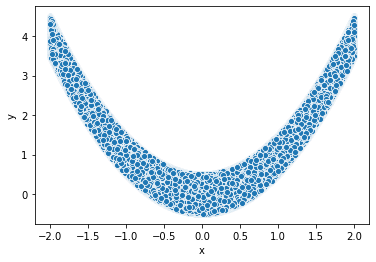

In [15]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = (df["x"]*df["x"]) + df["error"]

sns.scatterplot(data=df, x='x', y='y')

X and Y are obviously related, there is a square relationship between them. 

Let us see how correlation and pps handle this

### 9.0 Check correlation

I love how easy it is now to get correlation. 

Let's get **Pearson** first

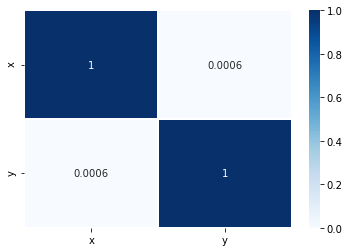

In [16]:
sns.heatmap(df[['x','y']].corr(), vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

So, what do you think. 

#### X in not related to Y, linearly

**Of course we know that.**

#### Let us check for our marks data now

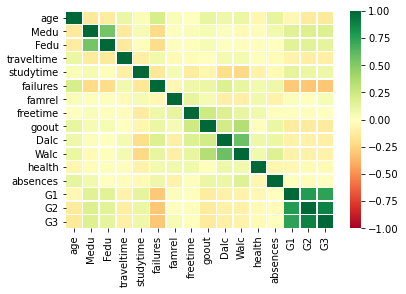

In [17]:
sns.heatmap(maths_marks.corr(method='kendall'), vmin=-1, vmax=1, cmap="RdYlGn", linewidths=0.5)

### What is that telling you?

### 10.0 Using pps

The calculation is fairly similar to correlation matrix. and then can be plotted the same way as well with heatmap. 

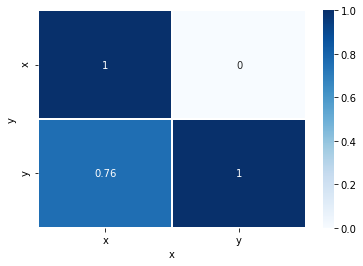

In [33]:
df_matrix = pps.matrix(df[['x','y']])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(df_matrix[['x','y']], vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Why would x vs y be 0, let us look into pps.score

In [29]:
pps.score(df, x='y', y='x', sample=5000)

{'x': 'y',
 'y': 'x',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.9893551635005684,
 'model_score': 1.074273774856183,
 'model': DecisionTreeRegressor()}

Interesting, looks like there is a high model score and the model seems reasonable. 

What if we flip to square root of x?

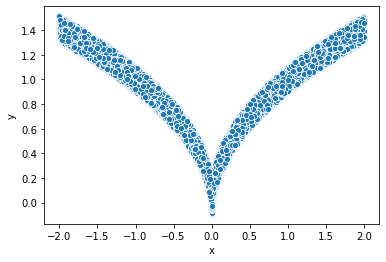

In [30]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.1, 0.1, 1_000_000)
df["y"] = np.sqrt(abs(df["x"])) + df["error"]

sns.scatterplot(data=df, x='x', y='y')

In [31]:
df_matrix['ppscore']

0    1.000000
1    0.673898
2    0.000000
3    1.000000
Name: ppscore, dtype: float64

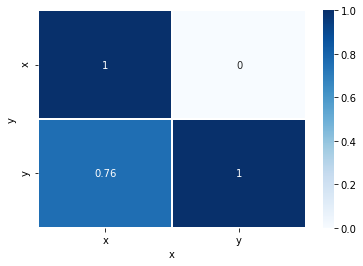

In [32]:
#pps.matrix(df)
df_matrix = pps.matrix(df[['x','y']])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Still the same 0 between y and x. 

This is because of the large variation in x for a given y (see below chart and horizontal line)

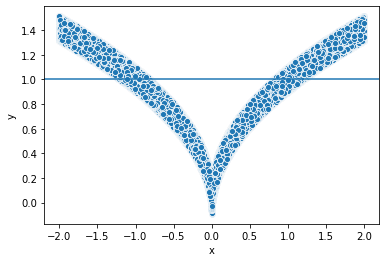

In [35]:
sns.scatterplot(data=df, x='x', y='y').axhline(1.0)

Let us look at our marks data again

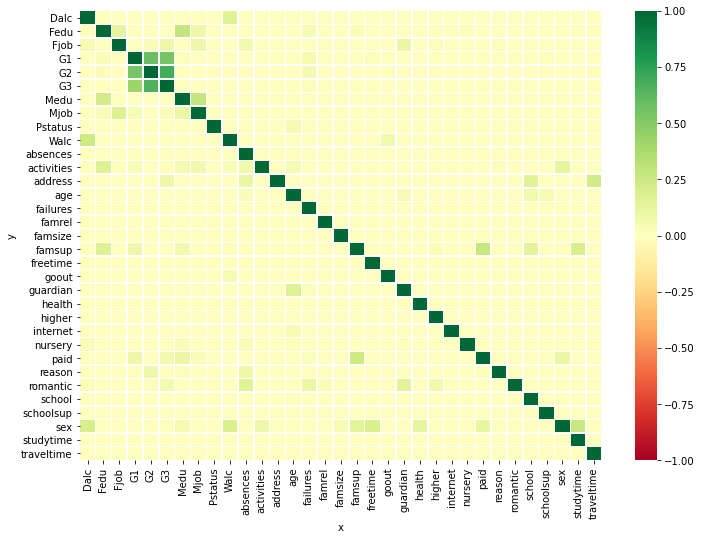

In [36]:
marks_matrix = pps.matrix(maths_marks)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(marks_matrix, vmin=-1, vmax=1, cmap="RdYlGn", linewidths=0.5)

Can you see we can look at more features this way? 

**https://github.com/8080labs/ppscore Check for more details**

### 11.0 Thoughts on active learning - Homework!

* In reality, data is always getting collected. 
* Often, faster than we can have experts annotate. 
* And often annotation is costly! or Unreliable! or Both.

* This is where active learning comes in?

* Can we annotate minimal points to get a reasonable accuracy?

* Equivalent - It's like feature engineering but at a row level. 